In [19]:
from PIL import Image, ImageSequence
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
!mkdir tmp

A subdirectory or file tmp already exists.


In [12]:
# path = '''D://xing-vimentin-dic-pipeline//src//livecell_dev//cxa-data//june_2022_data//day0Notreat_Group 1_wellA1_RI_MIP_stitched.tiff'''
# path = '''D://xing-vimentin-dic-pipeline//src//livecell_dev//cxa-data//june_2022_data//restart_day0_Group 1_wellA1_RI_MIP_stitched.tiff'''
from pathlib import Path
dir_path = Path('''D:/LiveCellTracker-dev/datasets/wayne/seg_images''')
ext = "npy"
npy_path_list = sorted(glob.glob(str(Path(dir_path) / ("*.%s" % (ext)))))


uint8
(27, 200, 200)


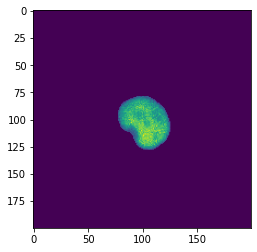

In [35]:
img = np.load(npy_path_list[1])
print(img.dtype)
print(img.shape)
plt.imshow(img[20, :, :])

ndigits: 4
#################################################
uint8
(3, 200, 200)
#################################################
uint8
(27, 200, 200)


A subdirectory or file tmp_dir_path already exists.


TypeError: Cannot handle this data type: (1, 1, 27), |u1

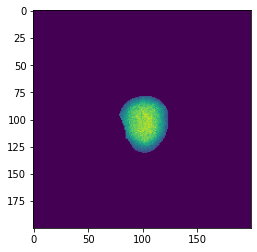

In [31]:
ndigits = len(str(len(npy_path_list)))
print("ndigits: %d" % (ndigits))
def gen_T_filename(frame, ndigits):
    return "T%s.tif" % (str(frame).zfill(ndigits))

tmp_dir_path = "./tmp"
!mkdir tmp_dir_path
for i, path in enumerate(npy_path_list):
    img = np.load(path)
    img = img.astype(np.uint8)
    print("#################################################")
    print(img.dtype)
    print(img.shape)
    plt.imshow(img[0, :, :])
    img = img.swapaxes(0, 2)
    img = Image.fromarray(img)
    img.save(Path(tmp_dir_path) / os.path.basename(path.replace(".npy", ".png")))